This project analyzes my personal Netflix data. The goal is to find out the total amount of time I spent watching Lego Ninjago and when (days) do I watch it.

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\DaReaders\Desktop\PythonPrograms\Projects\ViewingActivity.csv')

Review data to make sure everything looks correct

In [2]:
df.shape

(27340, 10)

Preview the first few rows of data

In [3]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ayo,11/24/2020 23:41,0:00:03,Autoplayed: user action: None;,Turbo FAST: Season 3: Hawaii Five-No / The St...,NaN,Vizio MG176 MT5597 CAST/HYBRID INX Smart TV,0:00:41,0:00:41,US (United States)
1,Ayo,11/24/2020 23:19,0:22:12,Autoplayed: user action: None;,Turbo FAST: Season 3: Worst in Show / Belle of...,NaN,Vizio MG176 MT5597 CAST/HYBRID INX Smart TV,0:22:50,0:22:50,US (United States)
2,Ayo,11/24/2020 22:57,0:22:11,Autoplayed: user action: None;,Turbo FAST: Season 3: The Ants and the Grassho...,NaN,Vizio MG176 MT5597 CAST/HYBRID INX Smart TV,0:22:49,0:22:49,US (United States)
3,Ayo,11/24/2020 22:34,0:22:14,NaN,Turbo FAST: Season 3: Best Frenemies / The Jam...,NaN,Vizio MG176 MT5597 CAST/HYBRID INX Smart TV,0:22:49,0:22:49,US (United States)
4,Eddy,11/24/2020 19:45,0:03:06,NaN,Transporter 3,NaN,iPad Pro 2 12.9 (Wi-Fi/Cell),0:03:06,0:03:06,DK (Denmark)


Drop unnecessary columns. This code analyzes how much and when LEGO Ninjago is watched. 
The only columns needed are the Start Time, Duration, and Title columns. Everything else can go.

In [4]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(5)

,Start Time,Duration,Title
0,11/24/2020 23:41,0:00:03,Turbo FAST: Season 3: Hawaii Five-No / The St...
1,11/24/2020 23:19,0:22:12,Turbo FAST: Season 3: Worst in Show / Belle of...
2,11/24/2020 22:57,0:22:11,Turbo FAST: Season 3: The Ants and the Grassho...
3,11/24/2020 22:34,0:22:14,Turbo FAST: Season 3: Best Frenemies / The Jam...
4,11/24/2020 19:45,0:03:06,Transporter 3


Convert Strings to Datetime and Timedelta in Pandas.
First obtain the list of the data types for each column in the dataframe 

In [5]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with)

In [6]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

Convert Start Time from UTC to our local timezone

In [7]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2020-11-24 18:41:00-05:00,0:00:03,Turbo FAST: Season 3: Hawaii Five-No / The St...


Convert Duration to timedelta (a time duration format pandas can understand and perform calculations with)

In [8]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

Filter Strings by Substring in pandas Using str.contains. Create a new dataframe called model that that takes from df.
Only the rows in which the Title column contains 'LEGO Ninjago'

In [9]:
model = df[df['Title'].str.contains('LEGO Ninjago', regex=False)]

In [10]:
# Check the size of the new dataframe
model.shape

(913, 3)

Filter out short durations. Filter office dataframe by limiting it to only rows where the Duration value is greater than one minute

In [19]:
model = model[(model['Duration'] > '0 days 00:01:00')]
model.shape
model.head(5)

,Start Time,Duration,Title,weekday,hour
58,2020-11-22 15:57:00-05:00,0 days 00:04:37,LEGO Ninjago: Season 2: Episode 24,6,15
69,2020-11-22 12:06:00-05:00,0 days 00:05:57,LEGO Ninjago: Season 2: Episode 24,6,12
70,2020-11-22 12:03:00-05:00,0 days 00:02:19,LEGO Ninjago: Season 2: Episode 23,6,12
71,2020-11-22 11:56:00-05:00,0 days 00:06:26,LEGO Ninjago: Season 2: Episode 23,6,11
72,2020-11-22 11:47:00-05:00,0 days 00:08:48,LEGO Ninjago: Season 2: Episode 22,6,11


Analyze the data.
First how much time was spent watching LEGO Ninjago.

In [13]:
model['Duration'].sum()

Timedelta('7 days 12:15:45')

Find out when LEGO Ninjago is watched. 

In [14]:
#On which days of the week have I watched the most LEGO Ninjago episodes?
model['weekday'] = model['Start Time'].dt.weekday

#During which hours of the day do I most often start LEGO Ninjago episodes?
model['hour'] = model['Start Time'].dt.hour

# check to make sure the columns were added correctly
model.head(1)

,Start Time,Duration,Title,weekday,hour
58,2020-11-22 15:57:00-05:00,0 days 00:04:37,LEGO Ninjago: Season 2: Episode 24,6,15


Visualize Result.
Plot a chart of viewing habits by day of the week

In [15]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'LEGO Ninjago Episodes Watched by Day'}>

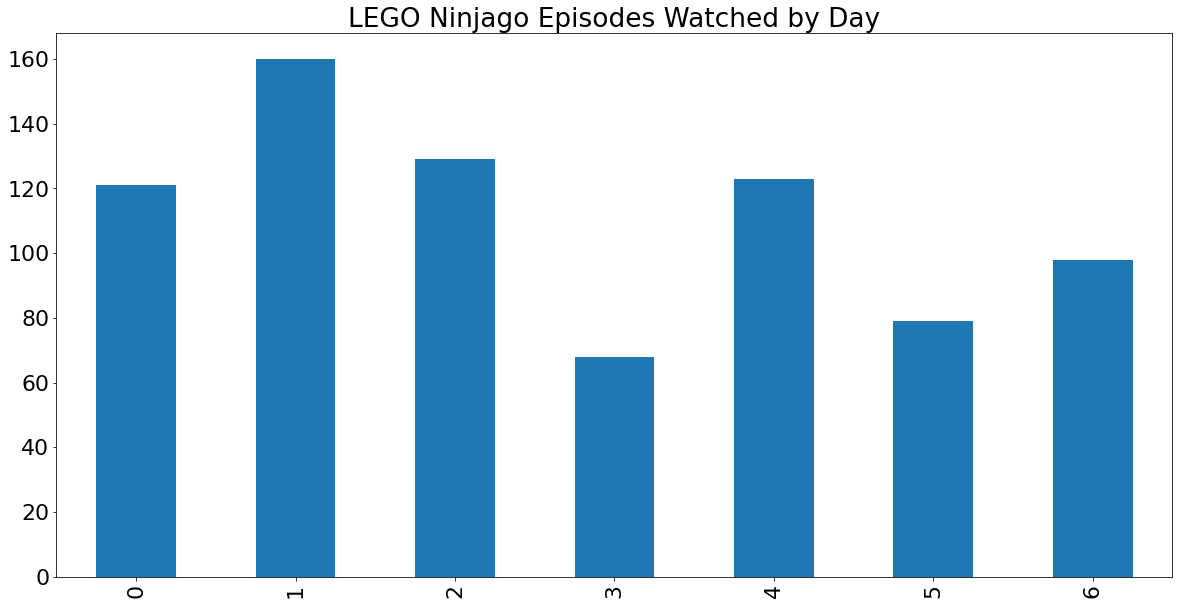

In [16]:
# set our categorical and define the order so the days are plotted Monday-Sunday
model['weekday'] = pd.Categorical(model['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create model_by_day and count the rows for each weekday, assigning the result to that variable
model_by_day = model['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
model_by_day = model_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot model_by_day as a bar chart with the listed size and title
model_by_day.plot(kind='bar', figsize=(20,10), title='LEGO Ninjago Episodes Watched by Day')

<AxesSubplot:title={'center':'LEGO Ninjago Episodes Watched by Hour'}>

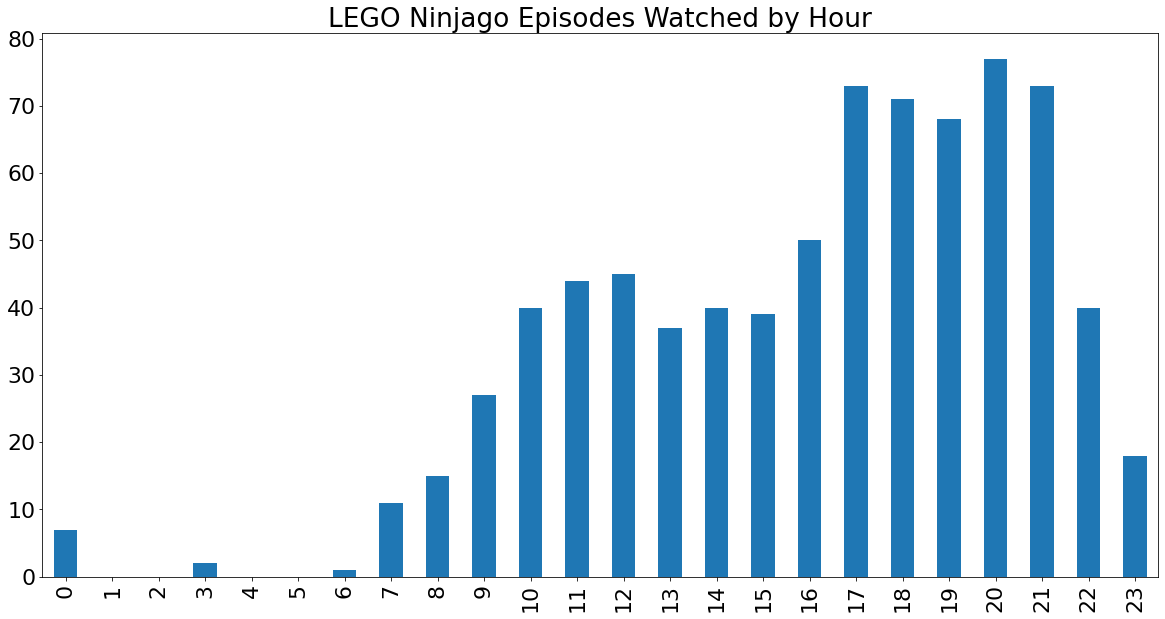

In [17]:
# set our categorical and define the order so the hours are plotted 0-23
model['hour'] = pd.Categorical(model['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create model_by_hour and count the rows for each hour, assigning the result to that variable
model_by_hour = model['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
model_by_hour = model_by_hour.sort_index()

# plot model_by_hour as a bar chart with the listed size and title
model_by_hour.plot(kind='bar', figsize=(20,10), title='LEGO Ninjago Episodes Watched by Hour')